# So sánh các thuật toán - Sentiment Analysis
Notebook này so sánh Logistic Regression, Naive Bayes, và LinearSVC.


Logistic Regression:
Accuracy: 0.89
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Naive Bayes:
Accuracy: 0.85
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      4961
    Positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


LinearSVC:
Accuracy: 0.88
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4961
    Positive       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88  

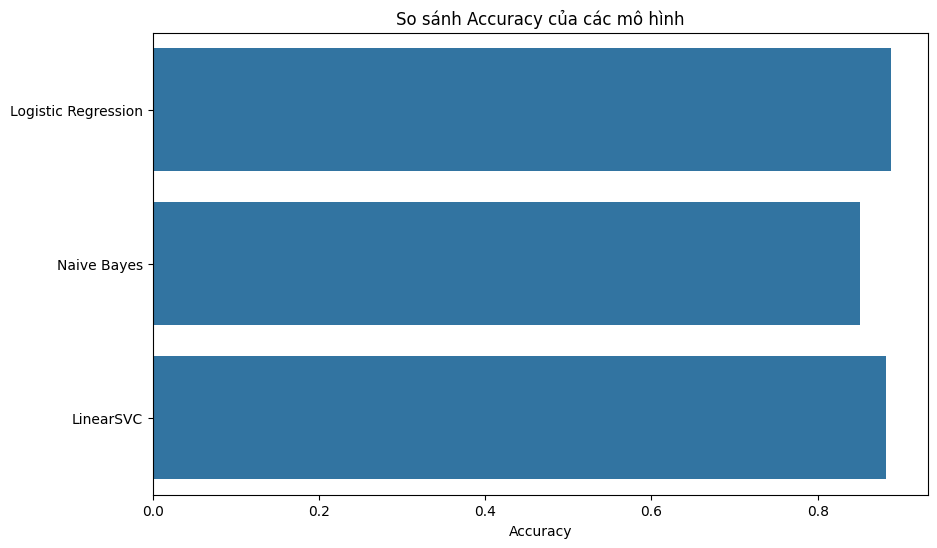

In [3]:
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Tải dữ liệu
df = pd.read_csv('../data/processed/cleaned_reviews.csv')
vectorizer = joblib.load('../models/tfidf_vectorizer.pkl')
X = vectorizer.transform(df['cleaned_review'])
y = df['sentiment']

# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=200),
    'Naive Bayes': MultinomialNB(),
    'LinearSVC': LinearSVC(max_iter=2000)
}

# Huấn luyện và đánh giá
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'time': time.time() - start_time}
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    joblib.dump(model, f'../models/{name.lower().replace(" ", "_")}_model.pkl')

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
sns.barplot(x=[results[name]['accuracy'] for name in results], y=list(results.keys()))
plt.title('So sánh Accuracy của các mô hình')
plt.xlabel('Accuracy')
plt.savefig('../results/model_comparison_accuracy.png')
plt.show()